In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import json
import math
import pandas as pd
plt.rcParams['figure.figsize']=(6,6)
plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['lines.linewidth']=2
plt.rcParams['lines.markeredgewidth']=2
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
sys.path.append('/Applications/OpenFUSIONToolkit/python')
# tokamaker_python_path = os.getenv('OFT_ROOTPATH')
# if tokamaker_python_path is not None:
#     sys.path.append(os.path.join(tokamaker_python_path,'python'))
from OpenFUSIONToolkit.TokaMaker import TokaMaker
from OpenFUSIONToolkit.TokaMaker.meshing import load_gs_mesh
from OpenFUSIONToolkit.TokaMaker.util import create_isoflux, read_eqdsk

In [6]:
with open('example/DIIID_geom.json','r') as fid:
    DIIID_geom = json.load(fid)

gEQDSKs = [x for x in os.listdir('gEQDSKs') if 'tm' not in x]
print(gEQDSKs)

['g173630.03000', 'g199085.03500', 'g192185.02440', 'g174083.03500', 'g174864.02500']


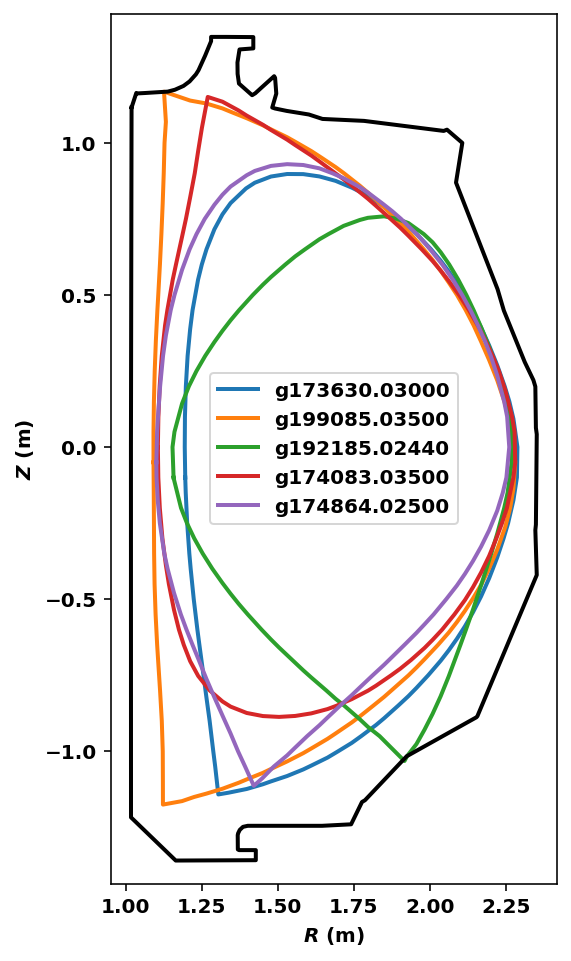

In [10]:
# Make the figure

fig = plt.figure(figsize=(4,8))
ax = plt.subplot(111)

for target_name in gEQDSKs:
    target_eq = read_eqdsk(f'gEQDSKs/{target_name}')
    target_bndry = target_eq['rzout'].copy()
    ax.plot(target_bndry[:,0], target_bndry[:,1], lw=2, label=target_name) 

# Plot the limiter
lim = np.array(DIIID_geom['limiter'])
ax.plot(np.hstack((lim[:,0],lim[0,0])), np.hstack((lim[:,1],lim[0,1])), c='k')

ax.axis('equal')
ax.set_xlabel(r'$\it{R}$ (m)')
ax.set_ylabel(r'$\it{Z}$ (m)')
ax.legend()